## 决策树
### 决策树的一个重要任务是为了数据中所蕴含的知识信息
- 决策树可以使用不熟悉的数据集合，并从中提取出一系列规则，在这些机器根据数据集创建规则时，就是机器学习的过程
- k-近邻算法可以完成很多分类任务，但是它最大的缺点就是无法给出数据的内在含义，决策树的主要优势就在于数据形式非常容易理解

#### 决策数的构造
- 优点：计算复杂度不高，输出结果易于理解，对中间值对缺失不敏感，可处理不相关特征数据
- 缺点：可能会产生过度匹配的问题
- 适用数据类型：数值型和 标称型

**构建决策树的第一个问题：当前数据集上哪个特征在划分数据分类时起决定性作用**
- 为了找到决定性的特征，划分出最好的结果，我们必须评估每个特征。
- 完成测试之后，原始数据集就被划分为几个数据子集
- 这些数据子集会分布在第一个决策点的所有分支上。如果某个分支下的数据属于同一类型，则当前条件已经正确地划分数据分类， 无需进一步对数据集进行分割。
- 如果数据子集内的数据不属于同一类型，则需要重复划分数据子集的过程

**思路**
检测数据集中的每个子项是否属于同一分类: 
    If so return 类标签;
    Else
        寻找划分数据集的最好特征
        划分数据集
        创建分支节点
            for 每个划分的子集 
                调用函数createBranch并增加返回结果到分支节点中
        return 分支节点

**决策树的一般流程**
1. 收集数据：可使用任何方法
2. 准备数据：构造算法只适用于标称型数据， 因此数值型数据必须离散化
3. 分析数据：可使用任何方法，构造树完成后，应检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误概率
6. 使用算法：此步骤可以适用于任何监督学习算法，决策树可以更好地理解数据的内在含义

#### 信息增益(information gain)和香农熵/熵(entropy)

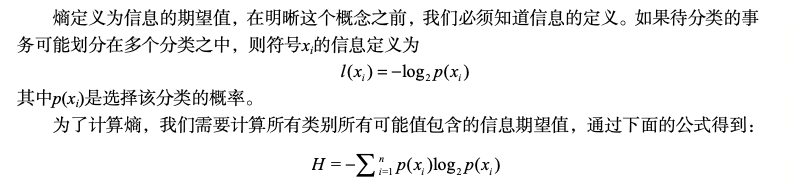

另一个度量集合无序程度的方法是基尼不纯度1(Gini impurity)，简单地说就是从一个数据集中随机选取子项，度量其被错误分类到其他分组里的概率

In [39]:
from math import log
import operator

In [20]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    # 为所有可能分类创建字典
    labelCounts= {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)   # 以 2为底求对数
    return shannonEnt     

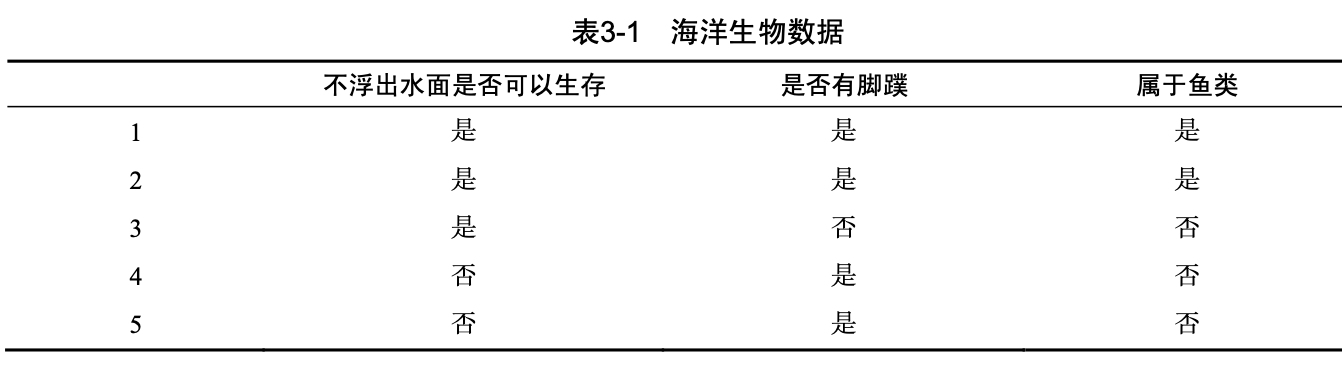

In [21]:
def createDataSet():
    dataSet = [
        [1,1,'yes'],
        [1,1,'yes'],
        [1,0,'no'],
        [0,1,'no'],
        [0,1,'no']
    ]  
    labels = ['no surfacing','flippers']
    return dataSet ,labels

In [22]:
myData, labels = createDataSet()

In [23]:
myData

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [24]:
labels

['no surfacing', 'flippers']

In [25]:
calcShannonEnt(myData)

0.9709505944546686

熵越高，则混合的数据也越多

In [26]:
myData[0][-1] = 'maybe'
myData

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [27]:
 calcShannonEnt(myData)

1.3709505944546687

#### 划分数据集

- 分类算法除了需要测量信息熵，还需要划分数据集， 度量划分数据集的熵，以便判断当前是否正确地划分了数据集
- 将对每个特征划分数 据集的结果计算一次信息熵，然后判断按照哪个特征划分数据集是最好的划分方式

In [28]:
# 按照给定特征划分数据集
# 输入参数： 待划分待数据集、划分数据集的特征、需要返回的特征的值
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for featVec in dataSet:
        print("featVec",featVec)
        if featVec[axis] == value:
            print("axis",axis,"featVec[axis]",featVec[axis])
            reducedFeatVec = featVec[:axis]
            print("axis",axis,"reducedFeatVec:",reducedFeatVec)
            reducedFeatVec.extend(featVec[axis+1:])
            print("featVec[axis+1:]",featVec[axis+1:])
            print("axis",axis,"reducedFeatVec:",reducedFeatVec)
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [29]:
myData, labels = createDataSet()

In [30]:
myData

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [31]:
labels

['no surfacing', 'flippers']

In [32]:
splitDataSet(myData,0,1)

featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 0, 'no']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [0, 'no']
axis 0 reducedFeatVec: [0, 'no']
featVec [0, 1, 'no']
featVec [0, 1, 'no']


[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [33]:
splitDataSet(myData,0,0)

featVec [1, 1, 'yes']
featVec [1, 1, 'yes']
featVec [1, 0, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']


[[1, 'no'], [1, 'no']]

In [34]:
# 测试
a = [1,2,3]
b = [4,5,6]
a.append(b)
a

[1, 2, 3, [4, 5, 6]]

In [35]:
# 测试
a = [1,2,3]
b = [4,5,6]
a.extend(b)
a

[1, 2, 3, 4, 5, 6]

In [36]:
len(myData[0])-1

2

In [37]:
# 选择最好的数据集划分方式
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1  #特征的个数
    baseEntropy = calcShannonEnt(dataSet) # 基线熵
    print("baseEntropy:",baseEntropy)
    bestInfoGain = 0.0
    bestFeature = -1
    # 创建唯一的分类标签
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        print("featList:",featList)
        uniqueVals =  set(featList)
        print("uniqueVals:",uniqueVals)
        
        # 计算每种划分方式的信息熵
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i ,value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy  # 计算信息增益
        print("baseEntropy",baseEntropy,"i:",i,"newEntropy",newEntropy,"infoGain",infoGain)
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain   # 计算最好的信息增益
            bestFeature = i
    return bestFeature

函数介绍：选取特征、划分数据集、计算得出最好的划分数据集的特征
- 第一个要求是，数据必须是一种由列表元素组成的列表，而且所有的列表元素都要具有相同的数据长度;
- 第二个要求是，数据的最后一列或者每个实例的最后一个元素是当前实例的类别标签
- 无需限定list中的数据类型，它们既可以是数字也可以是字符串，并不影响实际计算

In [38]:
chooseBestFeatureToSplit(myData)

baseEntropy: 0.9709505944546686
featList: [1, 1, 1, 0, 0]
uniqueVals: {0, 1}
featVec [1, 1, 'yes']
featVec [1, 1, 'yes']
featVec [1, 0, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']
featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 0, 'no']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [0, 'no']
axis 0 reducedFeatVec: [0, 'no']
featVec [0, 1, 'no']
featVec [0, 1, 'no']
baseEntropy 0.9709505944546686 i: 0 newEntropy 0.5509775004326937 infoGain 0.4199730940219749
featList: [1, 1, 0, 1, 1]
uniqueVals: {0, 1}
featVec [1, 1, 'yes']

0

## 构建递归决策树

- 得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。
- 第一次划分之后，数据将被向下传递到树分支的下一个节点，在这个节点上，我们可以再次划分数据。
- **因此我们可以采用递归的原则处理数据集**
- 递归结束的条件是：程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类

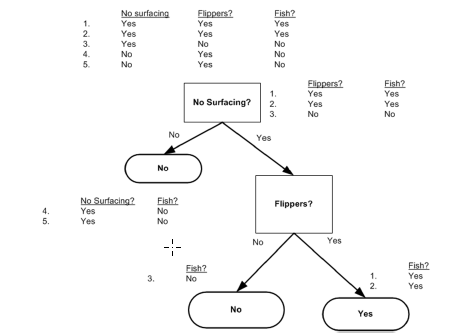

In [41]:
def majorityCnt(classList):
    classCount = {}
    for vote in classCount:
        if vote not in classCount.keys():
            classCount[vote] =0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse =True)
    return sortedClassCount[0][0]

**majorityCnt() 与投票表决代码非常类似**
1. 该函数使用分类名称的列表，
2. 然后创建键值为classList中唯一值的数据字典，字典对象存储了classList中每个类标签出现的频率
3. 最后利用operator操作键值排序字典，并返回出现次数最多的分类名称。

In [42]:
myData[0]

[1, 1, 'yes']

In [60]:
# 创建决策树
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    print("labels:",labels)
    print("classList:",classList)
    print("classList[0]:",classList[0])
    print("classList.count(classList[0]):",classList.count(classList[0]))
    
    ## 类别相同则停止划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    
    ## 遍历完所有特征时 返回出现次数最多的
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat] 
    print("bestFeatLabel",bestFeatLabel)
    myTree = {bestFeatLabel:{}}
    print("myTree:::",myTree)
    del(labels[bestFeat])
    print("labels:",labels)
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        print("subLabels:",subLabels)
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree

**代码注释**
- 使用两个输入参数：数据集和标签列表
1. 首先创建了名为classList的列表变量，其中包含了数据集的所有类标签
2. 递归函数的第一个停止条件是所有的类标签完全相同，则直接返回该类标签
3. 递归函数的第二个停止条件是使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组
4. 字典变量myTree存储了树的所有信息，这对于其后绘制树形图非常重要。当前数据集选取的最好特征存储在变量bestFeat中，得到列表包含的所有属性值
5. 最后代码遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数
createTree()，得到的返回值将被插入到字典变量myTree中

In [61]:
myData,labels = createDataSet()

In [62]:
createTree(myData,labels)

labels: ['no surfacing', 'flippers']
classList: ['yes', 'yes', 'no', 'no', 'no']
classList[0]: yes
classList.count(classList[0]): 2
baseEntropy: 0.9709505944546686
featList: [1, 1, 1, 0, 0]
uniqueVals: {0, 1}
featVec [1, 1, 'yes']
featVec [1, 1, 'yes']
featVec [1, 0, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']
featVec [0, 1, 'no']
axis 0 featVec[axis] 0
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'no']
axis 0 reducedFeatVec: [1, 'no']
featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 1, 'yes']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [1, 'yes']
axis 0 reducedFeatVec: [1, 'yes']
featVec [1, 0, 'no']
axis 0 featVec[axis] 1
axis 0 reducedFeatVec: []
featVec[axis+1:] [0, 'no']
axis 0 reducedFeatVec: [0, 'no']
featVec [0, 1, 'no']
featVec [0, 1, 'no']
baseEntropy 0.97095059445466

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 使用matplotlib注解绘制 树形图

In [69]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [70]:
simheifont = FontProperties(fname='../simhei.ttf')

In [71]:
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt, xycoords='axes fraction', 
                            xytext=centerPt, textcoords ='axes fraction',
                            va="center",ha="center",bbox=nodeType, arrowprops=arrow_args,
                            fontproperties= simheifont)
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode("决策节点",(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode("叶节点",(0.8,0.1),(0.3,0.8), leafNode)
    plt.show()

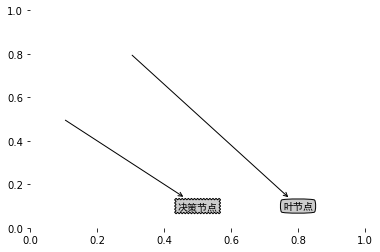

In [72]:
createPlot()

### 构造注解树

**获得多少叶节点-- X轴的长度** 

**获得树有多少层-- y轴的高度**

In [74]:
# 获取叶节点和树的层数
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':   ## 测试节点的数据类型是否字典
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':   ## 测试节点的数据类型是否字典
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [75]:
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing':{0:'no',1:{'flippers':{0:'no',1:'yes'}}}},
        {'no serfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}
    ]
    return listOfTrees[i]

In [76]:
retrieveTree(1)

{'no serfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [77]:
myTree = retrieveTree(0)

In [78]:
getNumLeafs(myTree)

TypeError: 'dict_keys' object is not subscriptable